# Chargement du CSV & création dataframe

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Chargement du fichier & vérification de la taille, on regarde les headers et on remplace les valeurs nulles par "0"

In [2]:
# Chargement du fichier dans un dataframe
df = pd.read_csv("MyMoviesCompleted.csv", sep=";", 
                 parse_dates=["viewing_date", "release_date"], 
                 decimal = ",")
# On remplit les vides avec 0
df = df.fillna("0")

# On convertit les types "objets" en entiers ou décimaux selon
df['imdb_rating'] = df['imdb_rating'].astype(float)
df['vote_average'] = df['vote_average'].astype(float)
df['vote_count'] = df['vote_count'].astype(int)
df['personal_rating'] = df['personal_rating'].astype(int)
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)
df['runtime'] = df['runtime'].astype(int)
df['production_countries_number'] = df['production_countries_number'].astype(int)
df['production_companies_number'] = df['production_companies_number'].astype(int)
df['actor_number'] = df['actor_number'].astype(int)
df['director_number'] = df['director_number'].astype(int)
df['producer_number'] = df['producer_number'].astype(int)
df['genre_number'] = df['genre_number'].astype(int)

# On multiplie mes notes par 2 pour être homogène à une note sur 10
df['personal_rating'] = df['personal_rating']*2

# On peut afficher les types des colonnes pour vérifier avec df.dtypes()
df.dtypes

title                                  object
imdb_rating                           float64
viewing_date                   datetime64[ns]
personal_rating                         int32
children                               object
tmdb_id                                object
original_language                      object
vote_count                              int32
vote_average                          float64
release_date                   datetime64[ns]
original_title                         object
budget                                float64
revenue                               float64
runtime                                 int32
imdb_id                                object
production_country                     object
production_countries_number             int32
production_company                     object
production_companies_number             int32
genre                                  object
genre_number                            int32
director                          

# Distribution & moyenne des ratings

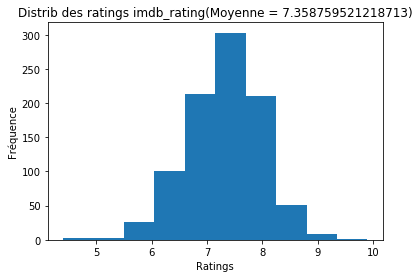

In [10]:
# Choix du rating personal_rating, imdb_rating, tmdb_rating = vote_average
QuelsRatings = "imdb_rating"

# filtrage des non nuls, histogramme & calcul moyenne
rated_movies_filtre = df[QuelsRatings]>0
filtered_movies = df[rated_movies_filtre]
plt.hist(filtered_movies[QuelsRatings])
plt.xlabel("Ratings")
plt.ylabel("Fréquence")
plt.title("Distrib des ratings " + QuelsRatings + "(Moyenne = " + str(np.mean(filtered_movies[QuelsRatings]))+")")
plt.show()

# Conclusion : je suis plus sévère que tmdb qui est plus severe qu'imdb

# Mes réalisateurs préférés

In [4]:
# Calcul de la moyenne de mes notes par directeur, dont j'ai vu au moins 3 films
df2 = df.groupby("director").count()
idf2 = df2["title"]>2
df2 = df.groupby("director").mean()
df2 = df2[idf2]
df2.groupby("director").mean().sort_values(by="personal_rating", ascending = False)

,imdb_rating,personal_rating,vote_count,vote_average,budget,revenue,runtime,production_countries_number,production_companies_number,genre_number,director_number,producer_number,actor_number
director,,,,,,,,,,,,,
Krzysztof Kieślowski,3.000000,9.142857,85.571429,8.042857,0.000000e+00,5.714157e+05,224.142857,2.000000,2.571429,2.142857,1.000000,0.571429,12.571429
J.C. Chandor,4.733333,8.666667,547.000000,6.500000,1.083333e+07,1.253994e+07,112.666667,1.333333,5.666667,2.666667,1.000000,4.333333,12.000000
Laurent Cantet,0.000000,8.000000,57.333333,6.166667,0.000000e+00,9.604860e+06,120.666667,1.333333,6.000000,1.000000,1.000000,2.333333,15.000000
Charlie Chaplin,0.000000,8.000000,291.444444,7.611111,1.130333e+06,2.946576e+06,105.888889,1.111111,1.444444,2.333333,1.000000,1.000000,35.222222
Vittorio De Sica,0.000000,8.000000,149.000000,7.866667,4.433333e+04,1.205707e+05,91.666667,1.000000,1.666667,1.000000,1.000000,2.000000,11.000000
Vincente Minnelli,1.875000,8.000000,36.000000,6.750000,3.895000e+05,0.000000e+00,126.500000,1.250000,1.250000,1.750000,1.000000,1.000000,16.250000
John Cassavetes,2.050000,8.000000,38.750000,6.975000,2.500000e+05,0.000000e+00,141.250000,1.000000,1.250000,1.750000,1.000000,1.750000,10.750000
Roberto Rossellini,0.000000,8.000000,53.666667,7.466667,0.000000e+00,0.000000e+00,94.333333,1.000000,1.666667,1.333333,1.000000,2.000000,12.333333
Josef von Sternberg,1.100000,7.714286,23.285714,6.657143,1.285714e+05,0.000000e+00,92.857143,1.000000,1.142857,2.285714,1.000000,1.000000,12.428571


# Distribution de mes films par an

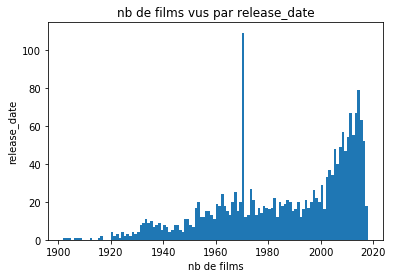

In [12]:
# Histogramme resamplé de mes vues (viewing_date) / dates de release (release_date)
quelle_date = "release_date"

# On crée une série avec l'année extraite (utilisation des fonctions map & lambda)
serie = df[quelle_date].map(lambda x:x.year)

# On affiche la serie
plt.hist(serie, bins = range (min(serie), max(serie)+2))
plt.xlabel("nb de films")
plt.ylabel(quelle_date)
plt.title("nb de films vus par " + quelle_date)
plt.show()

# Conclusion sur films vus par viewing_date : grosse année en 2009, je suis sur un trend de 100 à 200 ensuite
# Conclusion sur les films vus par année de release :je regarde plus de films récents, mais un outlier 
# en 1970 du au parsing des dates nulles lors du read_csv qui retourne 1970-01-01 par défaut

In [6]:
# Histogramme resamplé de mes vues (viewing_date) / dates de release (release_date)
quelle_date = "release_date"

# On crée une série avec l'année extraite (utilisation des fonctions map & lambda)
serie = df[quelle_date].map(lambda x:x.year)

# On groupby le dataframe resamplé avec l'index de cette série et on sort la tranche qui correspond au max
rd = df.groupby(pd.Index(serie)).count()
rdi = rd["release_date"]>30
rd[rdi]
# Conclusion : c'est 1970 la "grosse année", ça ne matche pas avec mon excel, voir si c'est pas une erreur
# Oui c'est une erreur : en cas de blanc quand j'ai parsé le csv il me retourne 1970 par défaut


,title,imdb_rating,viewing_date,personal_rating,children,tmdb_id,original_language,vote_count,vote_average,release_date,...,production_countries_number,production_company,production_companies_number,genre,genre_number,director,director_number,producer,producer_number,actor_number
release_date,,,,,,,,,,,,,,,,,,,,,
1970,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
2002,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2003,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
2004,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
2005,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
2006,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
2007,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
2008,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
2009,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


# Sous totaux
par exemple nb de films par langue, production_country, etc. et on graphe les 10 plus populaires

In [7]:
languespopu = df["original_language"].value_counts()
languespopu[:10]

en    1131
fr     333
ja     110
0       75
it      46
de      45
ko      35
pl      30
es      27
zh      25
Name: original_language, dtype: int64

# Filtrage conditionnel d'un bout de dataframe

In [8]:
# par exemple en langue jap avec un rating perso>4
films_jap = df["original_language"]== "ja"
bons_films = df["personal_rating"] > 4
df[films_jap & bons_films]

,title,imdb_rating,viewing_date,personal_rating,children,tmdb_id,original_language,vote_count,vote_average,release_date,...,production_countries_number,production_company,production_companies_number,genre,genre_number,director,director_number,producer,producer_number,actor_number
0,The face of another,8.0,2015-12-19,6,none,29452,ja,44,7.5,1966-07-15,...,1,Toho Film (Eiga) Co. Ltd.,2,Drama,2,Hiroshi Teshigahara,1,Nobuyo Horiba,3,10
99,Wings of hope,7.7,2016-03-13,8,none,311296,ja,1,8.0,1998-12-02,...,1,Kodansha,1,none,0,Keitaro Motonaga,2,Kenichiro Tsunoda,1,16
159,A.K,0.0,2009-01-08,8,S,396485,ja,7,6.0,1985-05-20,...,2,Nippon Herald Films,3,History,2,Chris Marker,1,Masato Hara,2,15
189,Noriko's dinner table,7.2,2015-12-28,6,none,42041,ja,29,6.9,2005-06-04,...,1,none,0,Drama,3,Sion Sono,1,none,0,16
209,Pale flower,7.8,2015-11-29,6,none,61475,ja,19,6.6,1964-03-01,...,1,Bungei Production Ninjin Club,1,Action,4,Masahiro Shinoda,1,none,0,7
248,Why Don't You Play in Hell?,7.3,2015-09-19,6,none,134350,ja,66,7.0,2013-09-14,...,1,King Record Co.,5,Drama,3,Sion Sono,1,Takuyuki Matsuno,2,17
270,Vers l'autre rive,6.0,2015-10-10,8,none,334991,ja,10,6.8,2015-09-30,...,1,WoWow,7,Fantasy,3,Kiyoshi Kurosawa,1,Hitoshi Endo,3,5
377,Irezumi,7.3,2015-04-18,6,none,88435,ja,5,8.0,1965-11-13,...,1,Nikkatsu,1,Drama,4,Seijun Suzuki,1,none,0,15
388,Irezumi,7.3,2015-05-04,6,none,88435,ja,5,8.0,1965-11-13,...,1,Nikkatsu,1,Drama,4,Seijun Suzuki,1,none,0,15
392,Deadly fight in Hiroshima,7.5,2015-01-04,6,none,52980,ja,12,7.7,1973-04-28,...,1,TOEI,1,Drama,3,Kinji Fukasaku,1,Gorô Kusakabe,1,17


# Question : moyenne de mes notes selon le langage
Suis je plus clément pour les films jap ou polonais ?

In [9]:
# Moyenne de tous les champs numériques des films regroupés en langages
moyennes = df.groupby("production_country").mean()
# On affiche par personal rating décroissant
moyennes.sort_values("personal_rating", ascending = False)

,imdb_rating,personal_rating,vote_count,vote_average,budget,revenue,runtime,production_countries_number,production_companies_number,genre_number,director_number,producer_number,actor_number
production_country,,,,,,,,,,,,,
Congo,0.000000,10.000000,1.000000,5.000000,0.000000e+00,0.000000e+00,80.000000,1.000000,0.000000,2.000000,2.000000,0.000000,3.000000
Ukraine,0.000000,9.000000,63.500000,7.850000,0.000000e+00,0.000000e+00,82.500000,1.000000,1.000000,1.500000,1.000000,0.500000,6.500000
Montenegro,7.500000,8.000000,7.000000,6.300000,0.000000e+00,0.000000e+00,120.000000,3.000000,5.000000,3.000000,1.000000,2.000000,10.000000
Netherlands,8.400000,8.000000,67.000000,7.900000,0.000000e+00,1.535160e+05,103.000000,10.000000,4.000000,1.000000,1.000000,1.000000,8.000000
Aruba,0.000000,8.000000,39.000000,6.000000,6.800000e+06,0.000000e+00,98.000000,2.000000,3.000000,2.000000,1.000000,2.000000,10.000000
Algeria,0.000000,8.000000,112.500000,7.850000,4.000000e+05,4.607740e+05,124.000000,2.000000,1.500000,2.500000,1.000000,2.000000,19.500000
Finland,0.000000,7.000000,53.500000,6.950000,2.373500e+05,0.000000e+00,81.500000,1.500000,2.500000,2.500000,1.000000,2.000000,11.000000
Sweden,1.215385,6.769231,211.076923,6.407692,3.676938e+05,8.296770e+05,88.461538,1.076923,1.538462,1.692308,0.923077,0.846154,10.846154
Poland,2.490476,6.761905,17.285714,7.004762,9.523810e+04,0.000000e+00,102.047619,1.000000,1.285714,1.904762,1.047619,0.142857,10.285714
